In [3]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd


In [4]:
housevalue = fch() #会需要下载，大家可以提前运行试试看

In [5]:
X = pd.DataFrame(housevalue.data) #放入DataFrame中便于查看

In [6]:
y = housevalue.target

In [7]:
X.shape

(20640, 8)

In [8]:
y.shape


(20640,)

In [9]:
X.head()


,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
X.columns=housevalue.feature_names

In [14]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


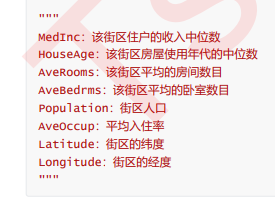

In [15]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)

In [16]:
for i in [Xtrain,Xtest]:
    i.index=range(i.shape[0])
Xtrain.shape

(14448, 8)

In [17]:
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [18]:
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [19]:
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.43735893059684006),
 ('HouseAge', 0.010211268294493883),
 ('AveRooms', -0.10780721617317668),
 ('AveBedrms', 0.6264338275363759),
 ('Population', 5.216125353348089e-07),
 ('AveOccup', -0.003348509646333704),
 ('Latitude', -0.4130959378947717),
 ('Longitude', -0.4262109536208464)]

In [20]:
reg.intercept_

-36.25689322920381

In [21]:
from sklearn.metrics import mean_squared_error as MSE

In [22]:
MSE(yhat,Ytest)

0.5309012639324571

In [23]:
y.max()

5.00001

In [24]:
y.min()

0.14999

In [26]:
cross_val_score(reg,X,y,cv=10,scoring="mean_squared_error")

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [27]:
import sklearn

In [28]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [29]:
#欢迎来的线性回归的大坑一号：均方误差为负。
#真正的均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字。
cross_val_score(reg,X,y,cv=10,scoring="neg_mean_squared_error")

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

$R^2$以使用三种方式来调用  
一种是直接从metrics中导入r2_score，输入预测值和真实值后打分。  
第二种是直接从线性回归LinearRegression的接口score来进行调用。  
第三种是在交叉验证中，输入"r2"来调用。  

In [30]:
from sklearn.metrics import r2_score

## metrics中导入r2_score

In [31]:
r2_score(yhat,Ytest)#错误的参数顺序

0.33806537615559906

In [34]:
#使用shift tab键来检查究竟哪个值先进行输入
r2_score(Ytest,yhat)

0.6043668160178817

In [35]:
#或者你也可以指定参数，就不必在意顺序了
r2_score(y_true = Ytest,y_pred = yhat)

0.6043668160178817

## 线性回归LinearRegression的接口score

In [32]:
r2 = reg.score(Xtest,Ytest)

In [33]:
r2

0.6043668160178817

## 交叉验证中，输入"r2"来调用

In [36]:
cross_val_score(reg,X,y,cv=10,scoring="r2").mean()

0.5110068610524557

In [38]:
import matplotlib.pyplot as plt
sorted(Ytest)

[0.14999,
 0.14999,
 0.225,
 0.325,
 0.35,
 0.375,
 0.388,
 0.392,
 0.394,
 0.396,
 0.4,
 0.404,
 0.409,
 0.41,
 0.43,
 0.435,
 0.437,
 0.439,
 0.44,
 0.44,
 0.444,
 0.446,
 0.45,
 0.45,
 0.45,
 0.45,
 0.455,
 0.455,
 0.455,
 0.456,
 0.462,
 0.463,
 0.471,
 0.475,
 0.478,
 0.478,
 0.481,
 0.481,
 0.483,
 0.483,
 0.485,
 0.485,
 0.488,
 0.489,
 0.49,
 0.492,
 0.494,
 0.494,
 0.494,
 0.495,
 0.496,
 0.5,
 0.5,
 0.504,
 0.505,
 0.506,
 0.506,
 0.508,
 0.508,
 0.51,
 0.516,
 0.519,
 0.52,
 0.521,
 0.523,
 0.523,
 0.525,
 0.525,
 0.525,
 0.525,
 0.525,
 0.527,
 0.527,
 0.528,
 0.529,
 0.53,
 0.531,
 0.532,
 0.534,
 0.535,
 0.535,
 0.535,
 0.538,
 0.538,
 0.539,
 0.539,
 0.539,
 0.541,
 0.541,
 0.542,
 0.542,
 0.542,
 0.543,
 0.543,
 0.544,
 0.544,
 0.546,
 0.547,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.551,
 0.553,
 0.553,
 0.553,
 0.554,
 0.554,
 0.554,
 0.555,
 0.556,
 0.556,
 0.557,
 0.558,
 0.558,
 0.559,
 0.559,
 0.559,
 0.559,
 0.56,
 0.56,
 0.562,
 0.566,
 0.567,
 

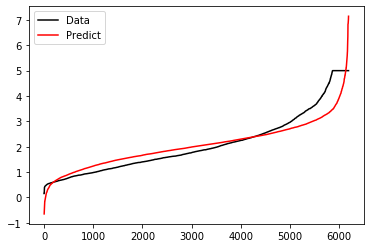

In [39]:
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

In [40]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')


array([-179.86577271,   -5.69860535,  -15.10281588,  -78.21750079,
        -70.19186257])